In [1]:
# Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the raw dataframe
raw_df = pd.read_csv('../data/raw/raw_data.csv', index_col=0)
raw_df

,id,type,created_at,actor_id,repo_id
2731946,27801357229,WatchEvent,2023-03-17 16:04:07+00:00,96197230,502327345
444715,27785570245,PushEvent,2023-03-17 02:40:59+00:00,50439943,615132553
1116708,27789156968,CreateEvent,2023-03-17 07:20:29+00:00,98630390,615206354
224527,27784606321,ReleaseEvent,2023-03-17 01:21:51+00:00,108975242,612011385
2525236,27799574297,PushEvent,2023-03-17 14:55:36+00:00,127407481,611731657
...,...,...,...,...,...
1777871,27793963647,PushEvent,2023-03-17 11:02:18+00:00,662377,389977040
2087553,27796063840,IssueCommentEvent,2023-03-17 12:38:51+00:00,10920466,17630288
3297025,27805172759,PushEvent,2023-03-17 19:10:03+00:00,5887243,59889094
3645046,27807235619,DeleteEvent,2023-03-17 21:16:28+00:00,102673642,613464255


In [3]:
# Filter the data to remove the bot activities
raw_df['count'] = raw_df.groupby('actor_id')['actor_id'].transform('count')
filtered_df = raw_df.query("count >= 1 & count <= 30")
filtered_df = filtered_df.drop('count', axis=1)
filtered_df

,id,type,created_at,actor_id,repo_id
2731946,27801357229,WatchEvent,2023-03-17 16:04:07+00:00,96197230,502327345
444715,27785570245,PushEvent,2023-03-17 02:40:59+00:00,50439943,615132553
1116708,27789156968,CreateEvent,2023-03-17 07:20:29+00:00,98630390,615206354
224527,27784606321,ReleaseEvent,2023-03-17 01:21:51+00:00,108975242,612011385
2525236,27799574297,PushEvent,2023-03-17 14:55:36+00:00,127407481,611731657
...,...,...,...,...,...
1213132,27789794468,WatchEvent,2023-03-17 07:57:38+00:00,52992585,460809071
3855773,27808297280,IssueCommentEvent,2023-03-17 22:42:30+00:00,11768175,309186380
1777871,27793963647,PushEvent,2023-03-17 11:02:18+00:00,662377,389977040
2087553,27796063840,IssueCommentEvent,2023-03-17 12:38:51+00:00,10920466,17630288


In [4]:
# Pivot the data to the count of event for clustering
pivot_df = pd.pivot_table(filtered_df, values='id', index='actor_id', columns='type', aggfunc=len, fill_value=0)

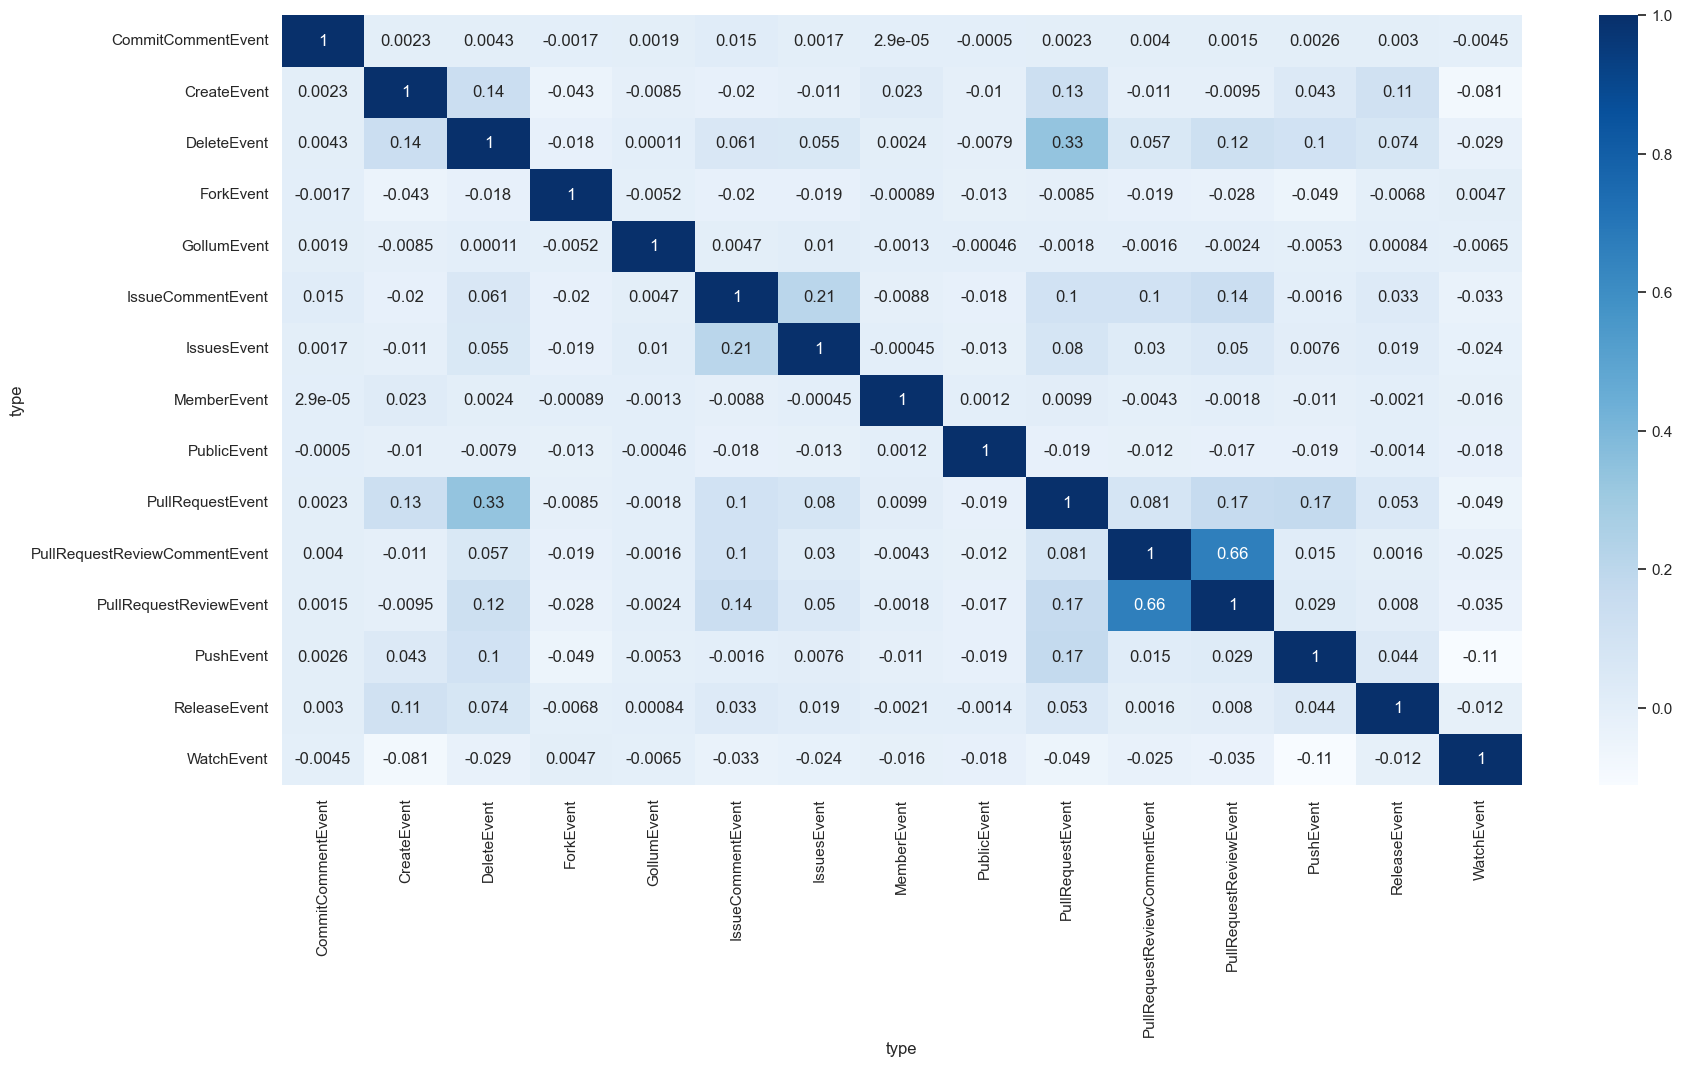

In [5]:
# Evaluate the hidden correlation to investigate probable 
cor = pivot_df.corr()
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

In [6]:
# Feature reduction to avoid multicollinearity
pivot_df = pivot_df[['CreateEvent',
                     'ForkEvent',
                     'IssuesEvent',
                     'PullRequestEvent',
                     'PullRequestReviewEvent',
                     'PushEvent',
                     'ReleaseEvent',
                     'WatchEvent']]

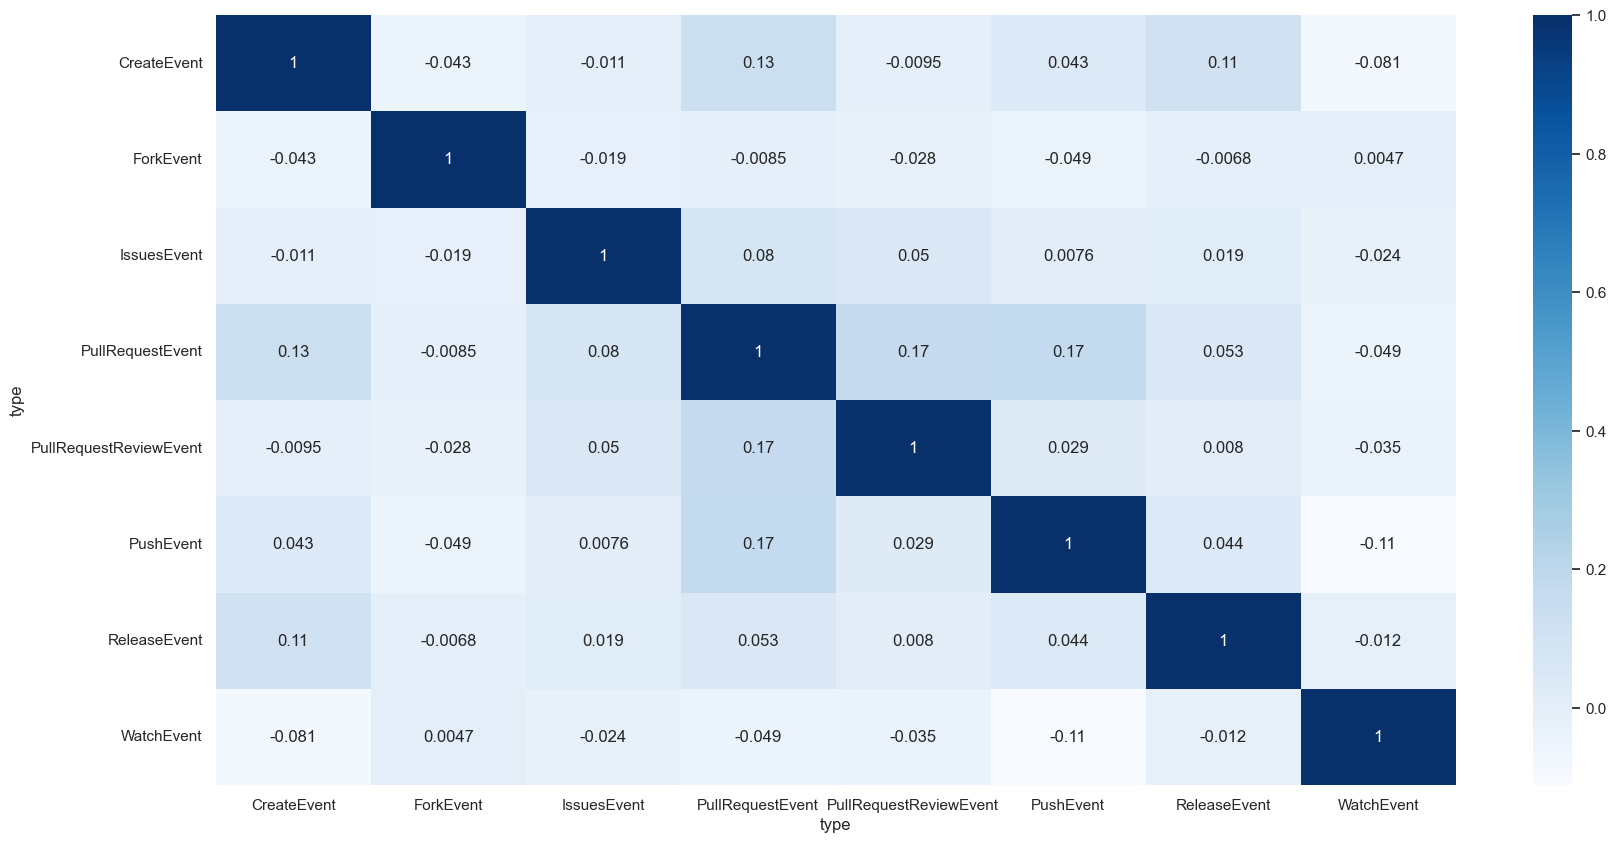

In [7]:
cor = pivot_df.corr()
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

In [8]:
pivot_df.to_csv('../data/processed/processed_ml.csv')